In [9]:
from scipy.stats import multivariate_normal
from massart import addNoise, ground_truth_permutations, flip_ranking
from LabelRankers import *

In [1]:
d = 20  # data dimension
k = 10  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W_opt = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=5000)

R_train = ground_truth_permutations(X_train, W_opt)
P_train = np.argsort(R_train, axis=1)

# Test data
X_test = D.rvs(size=1000)

R_test = ground_truth_permutations(X_test, W_opt)
P_test = np.argsort(R_test, axis=1)

In [2]:
labelwiseDecisionTreeLRScores = []
labelwiseRandomForestLRScores = []
pairwiseDecisionTreeLRScores = []
pairwiseRandomForestLRScores = []
pairwiseHalfspaceLRScores = []

def scores(eta_max):
  R_train_noisy = np.array([addNoise(y, eta_max) for y in R_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  labelwiseDecisionTreeLRScores.append(mean_kendall_rank_corr(P_test, LabelwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  labelwiseRandomForestLRScores.append(mean_kendall_rank_corr(P_test, LabelwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseDecisionTreeLRScores.append(mean_kendall_rank_corr(P_test, PairwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseRandomForestLRScores.append(mean_kendall_rank_corr(P_test, PairwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseHalfspaceLRScores.append(mean_kendall_rank_corr(P_test, PairwiseHalfspaceLR(0.005, 0.1, 0.8).fit(X_train, P_train_noisy).predict(X_test)))

In [2]:
LR_DT_R = {} # Decision Tree Regression
LR_DT_C = {} # Decision Tree Classification
LR_RF_R = {} # Random Forest Regression
LR_RF_C = {} # Random Forest Classification
LR_HH_C = {} # Homogeneous Halfspace Classification

In [3]:
etas = np.arange(0, .5, .05)

for eta in etas:
  R_train_noisy = np.array([flip_ranking(y, eta) for y in R_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  LR_DT_R[eta] = LabelwiseDecisionTreeLR().fit(X_train, P_train_noisy)
  LR_DT_C[eta] = PairwiseDecisionTreeLR().fit(X_train, P_train_noisy)
  LR_RF_R[eta] = LabelwiseRandomForestLR().fit(X_train, P_train_noisy)
  LR_RF_C[eta] = PairwiseRandomForestLR().fit(X_train, P_train_noisy)
  LR_HH_C[eta] = PairwiseHalfspaceLR(0.005, 0.1, 0.8).fit(X_train, P_train_noisy)

In [4]:
import pickle

# with open('LR_DT_R.pickle', 'wb') as handle: pickle.dump(LR_DT_R, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('LR_DT_C.pickle', 'wb') as handle: pickle.dump(LR_DT_C, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('LR_RF_R.pickle', 'wb') as handle: pickle.dump(LR_RF_R, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('LR_RF_C.pickle', 'wb') as handle: pickle.dump(LR_RF_C, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('LR_HH_C.pickle', 'wb') as handle: pickle.dump(LR_HH_C, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('LR_DT_R.pickle', 'rb') as handle: LR_DT_R = pickle.load(handle)
with open('LR_DT_C.pickle', 'rb') as handle: LR_DT_C = pickle.load(handle)
with open('LR_RF_R.pickle', 'rb') as handle: LR_RF_R = pickle.load(handle)
with open('LR_RF_C.pickle', 'rb') as handle: LR_RF_C = pickle.load(handle)
with open('LR_HH_C.pickle', 'rb') as handle: LR_HH_C = pickle.load(handle)

In [5]:
LR_DT_R_preds = {} # Decision Tree Regression
LR_DT_C_preds = {} # Decision Tree Classification
LR_RF_R_preds = {} # Random Forest Regression
LR_RF_C_preds = {} # Random Forest Classification
LR_HH_C_preds = {} # Homogeneous Halfspace Classification

In [6]:
for eta in etas:
  LR_DT_R_preds[eta] = LR_DT_R[eta].predict(X_test)
  LR_DT_C_preds[eta] = LR_DT_C[eta].predict(X_test)
  LR_RF_R_preds[eta] = LR_RF_R[eta].predict(X_test)
  LR_RF_C_preds[eta] = LR_RF_C[eta].predict(X_test)
  LR_HH_C_preds[eta] = LR_HH_C[eta].predict(X_test)

In [7]:
LR_DT_R_scores = {} # Decision Tree Regression
LR_DT_C_scores = {} # Decision Tree Classification
LR_RF_R_scores = {} # Random Forest Regression
LR_RF_C_scores = {} # Random Forest Classification
LR_HH_C_scores = {} # Homogeneous Halfspace Classification

In [12]:
for eta in etas:
  LR_DT_R_scores[eta] = mean_kendall_rank_corr(P_test, LR_DT_R_preds[eta])
  LR_DT_C_scores[eta] = mean_kendall_rank_corr(P_test, LR_DT_C_preds[eta])
  LR_RF_R_scores[eta] = mean_kendall_rank_corr(P_test, LR_RF_R_preds[eta])
  LR_RF_C_scores[eta] = mean_kendall_rank_corr(P_test, LR_RF_C_preds[eta])
  LR_HH_C_scores[eta] = mean_kendall_rank_corr(P_test, LR_HH_C_preds[eta])

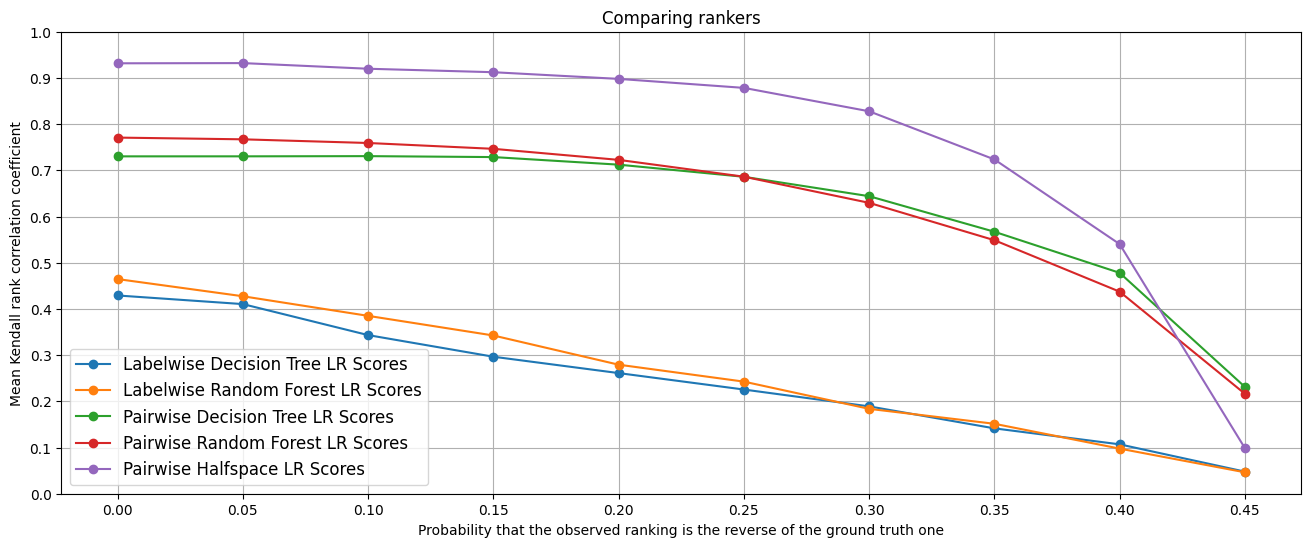

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.title('Comparing rankers')
plt.plot(etas, LR_DT_R_scores.values(), '-o')
plt.plot(etas, LR_DT_C_scores.values(), '-o')
plt.plot(etas, LR_RF_R_scores.values(), '-o')
plt.plot(etas, LR_RF_C_scores.values(), '-o')
plt.plot(etas, LR_HH_C_scores.values(), '-o')
plt.legend([
  'Labelwise Decision Tree LR Scores',
  'Labelwise Random Forest LR Scores',
  'Pairwise Decision Tree LR Scores',
  'Pairwise Random Forest LR Scores',
  'Pairwise Halfspace LR Scores'
  ], 
  fontsize=12
)
plt.xticks(etas)
plt.yticks(0.1*np.arange(11))
plt.xlabel('Probability that the observed ranking is the reverse of the ground truth one')
plt.ylabel('Mean Kendall rank correlation coefficient')
plt.grid()
plt.show()